In [27]:
def animate_activations(unit_locations, states, unit_activation):
    # Create a new figure
    plt.set_cmap('viridis')
    fig = plt.figure(figsize=(6, 5))

    # Add a 3D subplot
    ax = fig.add_subplot(111, projection="3d")

    # Plot the initial trajectory and unit locations
    trajectory, = ax.plot([], [], [], lw=2, c='r')
    units = ax.scatter(
        unit_locations[:, 0], unit_locations[:, 1], unit_locations[:, 2], c=[], s=20
    )

    # Set the title and labels
    #ax.set_title("Lorenz Unit Activations")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Function to update the plot for each frame
    def update(i):
        # Update the trajectory
        trajectory.set_data(states[:i+1, 0], states[:i+1, 1])
        trajectory.set_3d_properties(states[:i+1, 2])

        # Update the unit colors based on their activation state
        units.set_array(unit_activation[i, :])
        #units.set_alpha(0.5 + unit_activation[i, :] * 0.5)
        units.set_sizes(15 + unit_activation[i, :].cpu().numpy() * 100)

        return units
        # return trajectory, units

    # Create the animation
    plt.tight_layout()
    anim = FuncAnimation(fig, update, frames=len(states), interval=3)
    return fig, anim


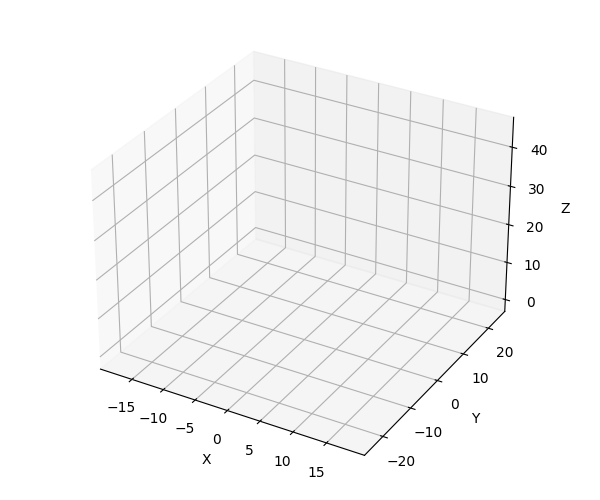

In [30]:
%matplotlib widget
fig, anim = animate_activations(
    unit_locations, sample_states[:1950:2], nonlinearity(torch.tensor(unit_activation[:1950:2]))
)

In [34]:
anim.save("nena/recurrent_training.gif", fps=60)

In [31]:
plt.close(fig)